In [ ]:
problems:
1-mixed format
2-batchNorm,loss
3-No.steps

# Import Library

In [6]:
#import cv2,os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import keras
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.applications import MobileNetV2,mobilenet_v2

import matplotlib.image as mpimg
from matplotlib import image
from PIL import Image , ImageFont


from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer

#import plotly.graph_objects as go
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow .keras.preprocessing.image import img_to_array,load_img

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Input, ZeroPadding2D, Dropout,AveragePooling2D
from tensorflow.keras.models import Model

 
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score,f1_score, confusion_matrix
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg19 import VGG19 

#from tensorflow.keras.applications import VGG16 ,Xception ,ResNet50 ,MobileNet ,DenseNet121 ,EfficientNetB1

In [7]:
np.random.seed(123)


# Viualize Accidents & Non Accidents images

In [8]:
# Read all accident images that in training set
list_images_accident = []
name_accident= []
for dirname, _, filenames in os.walk('./data/train/Accident'):
    for filename in filenames:
        list_images_accident.append(os.path.join(dirname, filename))
        name_accident.append(filename)
list_images_accident

['./data/train/Accident\\acc1 (1).jpg',
 './data/train/Accident\\acc1 (13).jpg',
 './data/train/Accident\\acc1 (14).jpg',
 './data/train/Accident\\acc1 (15).jpg',
 './data/train/Accident\\acc1 (2).jpg',
 './data/train/Accident\\acc1 (3).jpg',
 './data/train/Accident\\acc1 (5).jpg',
 './data/train/Accident\\accident_0_1.jpg',
 './data/train/Accident\\accident_0_10.jpg',
 './data/train/Accident\\accident_0_100.jpg',
 './data/train/Accident\\accident_0_1000.jpg',
 './data/train/Accident\\accident_0_1001.jpg',
 './data/train/Accident\\accident_0_1002.jpg',
 './data/train/Accident\\accident_0_1003.jpg',
 './data/train/Accident\\accident_0_1008.jpg',
 './data/train/Accident\\accident_0_101.jpg',
 './data/train/Accident\\accident_0_1011.jpg',
 './data/train/Accident\\accident_0_1012.jpg',
 './data/train/Accident\\accident_0_1015.jpg',
 './data/train/Accident\\accident_0_1016.jpg',
 './data/train/Accident\\accident_0_1017.jpg',
 './data/train/Accident\\accident_0_1019.jpg',
 './data/train/Acci

# Pickle.dump() Method In Python
### Method Signature:
##### pickle.dump(pythonObject, pickleDestination, pickle_protocol=None, *, fix_imports=True)
* The dump() method of the pickle module in Python, converts a Python object hierarchy into a byte stream.This process is also called as serilaization.
* The converted byte stream can be written to a buffer or to a disk file.
* The byte stream of a pickled Python object can converted back to a Python object using the pickle.load() method.

In [10]:
open_file = open("list_images_accident.txt", "wb")
pickle.dump(list_images_accident, open_file)
open_file.close()

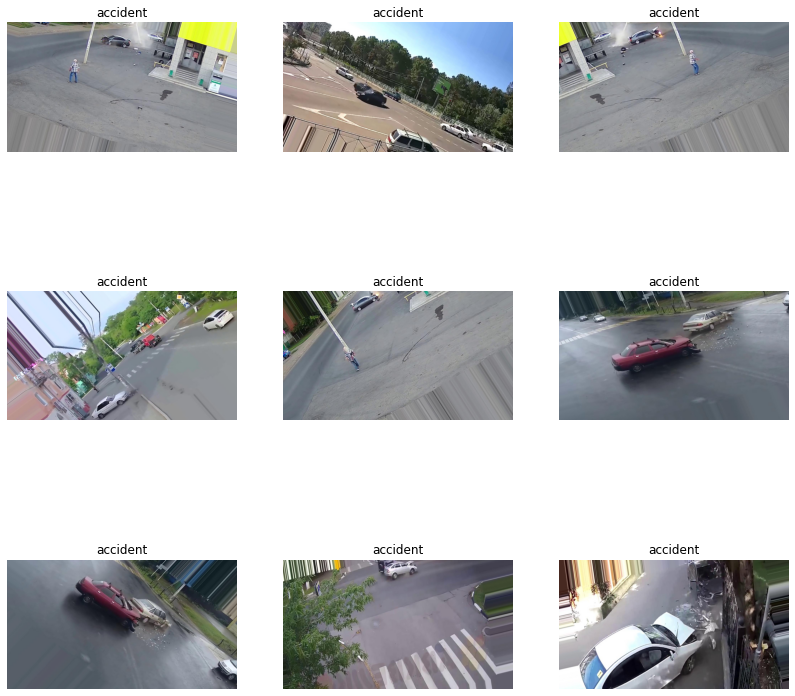

In [11]:
with open("list_images_accident.txt", "rb") as fp:
    accident = pickle.load(fp)
plt.figure(figsize=(14, 14))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(accident))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(accident[ran_num[i]]))
    plt.title("accident")
    plt.axis("off")

In [12]:
df_images_accident = pd.DataFrame()
df_images_accident["File_Name"] = name_accident
df_images_accident["Class"] = "accident"
df_images_accident

,File_Name,Class
0,acc1 (1).jpg,accident
1,acc1 (13).jpg,accident
2,acc1 (14).jpg,accident
3,acc1 (15).jpg,accident
4,acc1 (2).jpg,accident
...,...,...
6714,test_39.jpg,accident
6715,test_40.jpg,accident
6716,test_42.jpg,accident
6717,test_43.jpg,accident


In [13]:
# Read all accident images that in training set
list_images_no_accident = []
name_no_accident= []
for dirname_2, _, filenames_2 in os.walk('./data/train/Non Accident'):
    for filename in filenames_2:
        list_images_no_accident.append(os.path.join(dirname_2, filename))
        name_no_accident.append(filename)
list_images_no_accident

['./data/train/Non Accident\\5_10.jpg',
 './data/train/Non Accident\\5_11.jpg',
 './data/train/Non Accident\\5_12.jpg',
 './data/train/Non Accident\\5_13.jpg',
 './data/train/Non Accident\\5_14.jpg',
 './data/train/Non Accident\\5_15.jpg',
 './data/train/Non Accident\\5_17.jpg',
 './data/train/Non Accident\\5_24.jpg',
 './data/train/Non Accident\\5_25.jpg',
 './data/train/Non Accident\\5_27.jpg',
 './data/train/Non Accident\\5_28.jpg',
 './data/train/Non Accident\\5_29.jpg',
 './data/train/Non Accident\\5_30.jpg',
 './data/train/Non Accident\\5_5.jpg',
 './data/train/Non Accident\\5_6.jpg',
 './data/train/Non Accident\\5_7.jpg',
 './data/train/Non Accident\\5_8.jpg',
 './data/train/Non Accident\\5_9.jpg',
 './data/train/Non Accident\\non accident_0_10.jpg',
 './data/train/Non Accident\\non accident_0_100.jpg',
 './data/train/Non Accident\\non accident_0_1000.jpg',
 './data/train/Non Accident\\non accident_0_1002.jpg',
 './data/train/Non Accident\\non accident_0_1003.jpg',
 './data/trai

In [14]:
open_file = open("list_images_no_accident.txt", "wb")
pickle.dump(list_images_no_accident, open_file)
open_file.close()

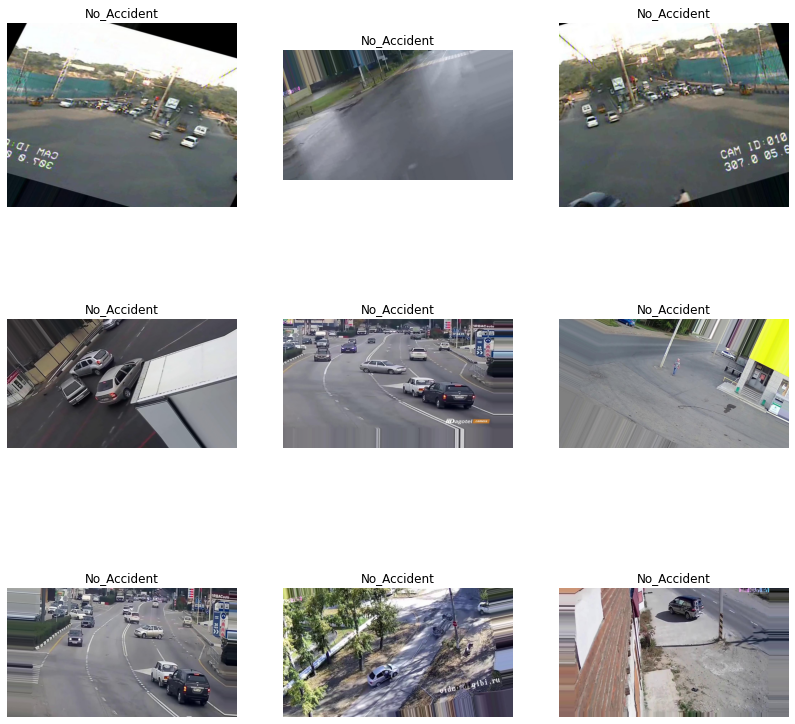

In [15]:
with open("list_images_no_accident.txt", "rb") as fp: 
    no_accident = pickle.load(fp)
plt.figure(figsize=(14, 14))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(no_accident))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(no_accident[ran_num[i]]))
    plt.title("No_Accident")
    plt.axis("off")

In [16]:
df_images_no_accident = pd.DataFrame()
df_images_no_accident["File_Name"] = name_no_accident
df_images_no_accident["Class"] = "No_Accident"
df_images_no_accident

,File_Name,Class
0,5_10.jpg,No_Accident
1,5_11.jpg,No_Accident
2,5_12.jpg,No_Accident
3,5_13.jpg,No_Accident
4,5_14.jpg,No_Accident
...,...,...
7246,test_5.jpg,No_Accident
7247,test_6.jpg,No_Accident
7248,test_7.jpg,No_Accident
7249,test_8.jpg,No_Accident


In [17]:
df_all_images = pd.concat([df_images_accident, df_images_no_accident], ignore_index=True)
df_all_images

,File_Name,Class
0,acc1 (1).jpg,accident
1,acc1 (13).jpg,accident
2,acc1 (14).jpg,accident
3,acc1 (15).jpg,accident
4,acc1 (2).jpg,accident
...,...,...
13965,test_5.jpg,No_Accident
13966,test_6.jpg,No_Accident
13967,test_7.jpg,No_Accident
13968,test_8.jpg,No_Accident


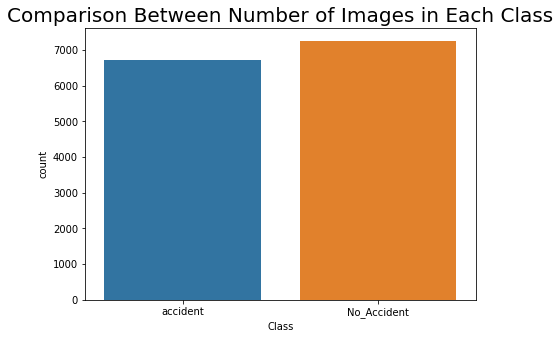

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(x = "Class", data = df_all_images)
plt.title('Comparison Between Number of Images in Each Class',fontdict={'fontsize':20});

# Prepare Images for Modeling

In [19]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(250, 250))
    x = image.img_to_array(img)
    return x

In [20]:
?matplotlib

In [21]:
images = []
labels = []

directory = os.fsencode('./data/train')

for folder in os.listdir(directory):
    label = os.fsdecode(folder)
    for img in os.listdir(f'./data/train/{label}'):
        img_name = os.fsdecode(img)
        images.append(prepare_image(f'./data/train/{label}/{img_name}'))
        labels.append(label)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Mylab1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-8f06aa8ff362>", line 10, in <module>
    images.append(prepare_image(f'./data/train/{label}/{img_name}'))
  File "<ipython-input-19-d22ad58c7ef5>", line 2, in prepare_image
    img = image.load_img(img_path, target_size=(250, 250))
  File "C:\Users\Mylab1\anaconda3\lib\site-packages\keras\preprocessing\image.py", line 313, in load_img
    return image.load_img(path, grayscale=grayscale, color_mode=color_mode,
  File "C:\Users\Mylab1\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py", line 113, in load_img
    with open(path, 'rb') as f:
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Mylab1\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2061

TypeError: object of type 'NoneType' has no len()

In [ ]:
label_0_1 = [int(labels[w].replace('Non Accident', "0").replace("Accident",'1')) for w in range(len(labels))]
label_0_1

In [ ]:
len(label_0_1)

In [ ]:
X, Y = images, label_0_1

In [30]:
X = np.array(X)
Y = np.array(Y)

In [32]:
open_file = open("X_250x250.txt", "wb")
pickle.dump(X, open_file)
open_file.close()

In [33]:
open_file = open("Y_250x250.txt", "wb")
pickle.dump(Y, open_file)
open_file.close()

In [ ]:
with open("X_250x250.txt", "rb") as fp: 
    x = pickle.load(fp)

In [4]:
with open("Y_250x250.txt", "rb") as fp: 
    y= pickle.load(fp)

# Read the dataset 

In [3]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [6]:
# ## Generated Validation Augmen
# train_datagen = ImageDataGenerator(rescale=1./255)
# train_generator =  train_datagen.flow_from_directory(
#     './data/train',
#     seed=42,
#     target_size= (img_height, img_width),
#     batch_size=batch_size, class_mode='binary')

In [4]:
## Generated Validation Augmen
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator =  val_datagen.flow_from_directory(
    './data/val',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='binary')

NameError: name 'ImageDataGenerator' is not defined

In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    './data/test',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='binary')

Found 100 images belonging to 2 classes.


In [2]:
# Create the data sets
x_train, y_train = x,y
x_val, y_val = next(val_generator)
x_test, y_test = next(test_generator)

NameError: name 'x' is not defined

In [10]:
y_train_cat = to_categorical(y_train)

In [1]:
y_train_cat.shape

NameError: name 'x_train' is not defined

In [11]:
# Checking the shapes of the datasets
m_train = x_train.shape[0]
num_px = x_train.shape[1]
m_val = x_val.shape[0]
m_test = x_test.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of validation samples: " + str(m_val))
print ("Number of testing samples: " + str(m_test))
print ("train_images shape: " + str(x_train.shape))
print ("train_labels shape: " + str(y_train.shape))
print ("val_images shape: " + str(x_val.shape))
print ("val_labels shape: " + str(y_val.shape))
print ("test_images shape: " + str(x_test.shape))
print ("test_labels shape: " + str(y_test.shape))

Number of training samples: 13970
Number of validation samples: 98
Number of testing samples: 100
train_images shape: (13970, 250, 250, 3)
train_labels shape: (13970,)
val_images shape: (98, 250, 250, 3)
val_labels shape: (98,)
test_images shape: (100, 250, 250, 3)
test_labels shape: (100,)


# Experiment0: Build Simple Neural Network Model - NN

In [ ]:
NN_1= tf.keras.models.Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         Flatten(),
                         Dense(40, activation='relu'),
                         Dense(2, activation='softmax')])

NN_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_1 = NN_1.fit(x_train, y_train_cat, epochs=5, verbose=1, validation_split=0.1)
predict_x = NN_1.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_1.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Valid: {accuracy_score(y_val, classes_x)}")

In [12]:
NN_1= tf.keras.models.Sequential([InputLayer(input_shape=x_train.shape[1:]),
                         Flatten(),
                         Dense(40, activation='relu'),
                         Dense(2, activation='softmax')])

NN_1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

NN_1 = NN_1.fit(x_train, y_train_cat, epochs=5,validation_data=(x_val,y_val))
predict_x = NN_1.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = NN_1.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Valid: {accuracy_score(y_val, classes_x)}")

Epoch 1/5
437/437 [==============================] - ETA: 0s - loss: 191.1936 - accuracy: 0.5405

ValueError: in user code:

    File "C:\Users\Mylab1\anaconda3\lib\site-packages\keras\engine\training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Mylab1\anaconda3\lib\site-packages\keras\engine\training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Mylab1\anaconda3\lib\site-packages\keras\engine\training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Mylab1\anaconda3\lib\site-packages\keras\engine\training.py", line 1305, in test_step
        self.compiled_loss(
    File "C:\Users\Mylab1\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Mylab1\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Mylab1\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Mylab1\anaconda3\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Mylab1\anaconda3\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 2) are incompatible


In [ ]:
font = ImageFont.truetype("arial.ttf", 12)
visualkeras.layered_view(NN_1, legend=True, font=font)

# Experiment1: Build First Neural Network Model - Convolutional Neural Networks(CNN)
### Before increase No. images in dataset

In [ ]:
## Defining Cnn
class_names=2
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
    
  layers.Dense((class_names), activation= 'softmax') #Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.
])
#Computes the crossentropy loss between the labels and predictions.
#Optimizer to find best weights
MyCnn.compile(optimizer='adam', 
              # Anything between 2 and `steps_per_epoch` could help here.This step enhanced our results before acc=.82,val_acc=.79
              #steps_per_execution = 50,
              loss='categorical_crossentropy', metrics=['accuracy'])
MyCnn.summary()

In [ ]:
## lets train our CNN
result1 = MyCnn.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs = 10)

In [ ]:
# Graph loss, accuracy for training and validation history
train_acc = result1.history['accuracy']
val_acc = result1.history['val_accuracy']
train_loss = result1.history['loss']
val_loss = result1.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'b*', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation Accuracy')
plt.grid(True)
plt.title('Accuracy')
plt.legend()
plt.figure()

plt.plot(epch, train_loss, 'b*', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.grid(True)
plt.title('Loss')
plt.legend()
plt.show()


# Model plotting in Keras

Keras also provides a function to create a plot of the network neural network graph that can make more complex models easier to understand.

The plot_model() function in Keras will create a plot of your network. This function takes a few useful arguments:

* model: (required) The model that you wish to plot.
* to_file: (required) The name of the file to which to save the plot.
* show_shapes: (optional, defaults to False) Whether or not to show the output shapes of each layer.
* show_layer_names: (optional, defaults to True) Whether or not to show the name for each layer.

Below is the updated example that plots the MyCnn model.

In [ ]:
#Model Architecture
from keras.utils.vis_utils import plot_model
plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
results_test = MyCnn.evaluate(testing_ds)
print('Test Loss:', results_test[0])
print('Test Accuracy:', results_test[1])

In [ ]:
MyCnn.save('CNNmodels/cnn_v1.h5')

# Using the model
* Loading the model
* Evaluating the model
* Getting predictions

In [ ]:
model = keras.models.load_model('CNNmodels/cnn_v1.h5')

In [ ]:
# Get predictions for confusion matrix
# Need to round predictions to whole numbers
predictions = MyCnn.predict(testing_ds)
predictions = np.round(predictions)

In [ ]:
# Function for plotting easier to read confusion matrix
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    class_names=2
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(class_names)
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

In [ ]:
labels_batch

In [ ]:
show_cf(labels_batch,predictions)

# Experiment2: Data Augmentation 

In [ ]:
?ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 40, 
    width_shift_range = 0.1,
    height_shift_range = 0.1, 
    brightness_range = (0.5, 1),
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True, 
    fill_mode='nearest')

In [ ]:
sample_df = df_images_accident.sample(1)

sample_generator = datagen.flow_from_dataframe(
    dataframe = sample_df,
    directory = './data/train/Accident',
    x_col = "File_Name",
    y_col = "Class")

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    for X, y in sample_generator:
        plt.imshow(X[0]/255)
        plt.axis("off")
        break
plt.tight_layout()
plt.show()

In [ ]:
Sample_list_images_no_accident = random.sample(list_images_no_accident, 422)
Sample_list_images_accident = random.sample(list_images_accident, 369)

In [ ]:
for path in Sample_list_images_accident:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='./data/train/Accident', save_prefix='accident', save_format='jpg'):
        i += 1
        if i > 5:
            break
            
for path in Sample_list_images_no_accident:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='./data/train/Non Accident', save_prefix='non accident', save_format='jpg'):
        i += 1
        if i > 5:
            break

In [ ]:
list_images_accident_Aug = []
name_accident_Aug= []
for dirname, _, filenames in os.walk('./data/train/Accident'):
    for filename in filenames:
        list_images_accident_Aug.append(os.path.join(dirname, filename))
        name_accident_Aug.append(filename)

list_images_accident_Aug = pd.DataFrame()
list_images_accident_Aug["File_Name"] = name_accident_Aug
list_images_accident_Aug["Class"] = "Accident"
list_images_accident_Aug

In [ ]:
list_images_no_accident_Aug = []
name_no_accident_Aug= []
for dirname, _, filenames in os.walk('./data/train/Non Accident'):
    for filename in filenames:
        list_images_no_accident_Aug.append(os.path.join(dirname, filename))
        name_no_accident_Aug.append(filename)

list_images_no_accident_Aug = pd.DataFrame()
list_images_no_accident_Aug["File_Name"] = name_no_accident_Aug
list_images_no_accident_Aug["Class"] = "Non Accident"
list_images_no_accident_Aug

In [ ]:
df_all_images_Aug = pd.concat([list_images_accident_Aug, list_images_no_accident_Aug], ignore_index=True)
df_all_images_Aug

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x = "Class", data = df_all_images_Aug)
plt.title('Comparison Between Number of Images in Each Class',fontdict={'fontsize':20});

In [ ]:
## Generated Validation Augmen
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator =  train_datagen.flow_from_directory(
    './data/train',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='categorical')

# Model fitting (augmented) and Accuracy/Loss Evaluation

In [ ]:
result2 = MyCnn.fit(x_train,y_train, validation_data= val_generator,epochs = 10)

predict_x = MyCnn.predict(x_val)
classes_x = np.argmax(predict_x, axis=1)
predict_r = MyCnn.predict(x_train)
classes_r = np.argmax(predict_r, axis=1)
print(f"Training: {accuracy_score(y_train, classes_r)}")
print(f"Vali: {accuracy_score(y_val, classes_x)}")

In [ ]:
result2_test = MyCnn.evaluate(test_generator)
print('Test Loss:', results_test[0])
print('Test Accuracy:', results_test[1])

In [ ]:
# Get predictions for confusion matrix
# Need to round predictions to whole numbers
predictions1 = MyCnn.predict(test_generator)
predictions1 = np.round(predictions1)

In [ ]:
# Function for plotting easier to read confusion matrix
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    class_names=2
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(class_names)
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

In [ ]:
# show_cf(test_labels,predictions1)

In [ ]:
MyCnn.save('CnnModelsAug/cnn_v1.h5')

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for n in predictions:
        predlabel.append(class_names[np.argmax(n)])
        prdlbl.append(np.argmax(n))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predict : '+ predlabel[i]+'   Real :'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)
